# [DCC 030] Aprendizado Profundo para Processamento de Linguagem Natural: Trabalho Prático 1
__Aluno:__
- Eduardo Villani de Carvalho Filho - 2015104008
---
# [Parte 1] O trabalho

## Introdução

Este trabalho tem como objetivo pôr em prática o que foi visto em sala de aula de como
o método Word2Vec funciona. Não iremos desenvolver um algoritmo do zero, mas sim utilizar
um já pronto; no caso deste trabalho, será utilizado a biblioteca *gensim*.

Inicialmente propõe-se comparar os dois algoritmos utilizados no Word2Vec: Skip-gram e CBOW. Além disso,
para os dois algoritmos, será testada dois corpus diferentes (text8 e text9) variando os hiperparâmetros
da class Word2Vec do *gensim* para achar a melhor acurácia. Achado os melhores modelos, fazermos algumas
comparação de similaridades e analogias.


## Bibliotecas que serão utilizadas

Aqui é definido todas as bibliotecas que serão utilizadas ao longo deste trabalho.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import multiprocessing
import numpy
import warnings
import logging

from gensim.models import Word2Vec
from gensim.models.word2vec import Text8Corpus

logging.basicConfig(
        filename='word2vec.log',
        format="%(asctime)s:%(levelname)s:%(message)s",
        level=logging.INFO
)

## Ignore warnings

Aqui é definidos alguns warnings para serem ignorados ao longo da execução com o mero intuito de deixar o
arquivo mais limpo

In [13]:
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

## Classe para auxiliar no uso dos algoritmos do Word2Vec

Definindo uma classe para saber qual algoritmo Word2Vec está sendo utilizado.

In [6]:
class Word2VecAlgorithm:
    CBOW = 0
    SKIP_GRAM = 1

## Definindo o número de cores do sistema

O Word2Vec tem um parâmetro *workers*, referente a quantidade de cores que serão utilizados na execução.
Este deve ser sempre core - 1.

In [164]:
cores = multiprocessing.cpu_count()

# [Parte 2] Definindo os modelos

Utilizando-se da class Word2Vec, iremos montar dois modelos: um para o algoritmo CBOW e o outro
para o algoritmo Skip-Gram. Serão utilizados dois corpus: Text8 e Text9. Ambos contêm informações na wikipedia,
mas o Text9 é maior e mais completo.

## Função para mostrar a acurácia de forma mais direta

In [5]:
def model_accuracy(w2v_accuracy):
    for section in w2v_accuracy:

        section_name = section['section']

        rights = len(section['correct'])
        wrongs = len(section['incorrect'])
        acc = round(rights/(rights + wrongs)*100,2)

        print(f"{section_name}: {acc}%")

## Função para carregar ou gerar os modelos (caso ainda não existam)

In [3]:
def get_model(corpus, model_file, sg, **kwargs):
    try:
        return Word2Vec.load(model_file)
    except FileNotFoundError:
        model = Word2Vec(
            corpus,
            sg=sg,
            **kwargs
        )
        model.save(model_file)
        return model



## Gerando o corpus dos modelos

Os corpus presentes são dois: text8 e text9. Ambos contêm artigos da Wikipedia, mas o Text8 é menor e menos
detalhada, enquanto o Text9 é maior e mais detalhado, i.e, é melhor para gerar analogias. Em contrapartida,
gasta-se mais tempo para gerar os modelos com o Text9 do que com o Text8.

In [7]:
text8_corpus = Text8Corpus("input/text8")
text9_corpus = Text8Corpus("input/text9")

## Gerando os modelos

### Skip Gram e CBOW: Text8 I

#### Definindo hiperparâmetros

In [8]:
hyperparameters ={
            "min_count": 5,
            "window": 2,
            "size": 130,
            "sample": 6e-5,
            "alpha": 0.03,
            "min_alpha": 0.0007,
            "negative": 20,
            "workers": cores - 1,
            "iter": 20
}

In [9]:
model_skip_gram_text8_i = get_model(
    corpus=text8_corpus,
    model_file=f"model/model_sg_{Word2VecAlgorithm.SKIP_GRAM}_text8_v0_iter{hyperparameters['iter']}",
    sg=Word2VecAlgorithm.SKIP_GRAM,
    **hyperparameters
)

In [11]:
model_cbow_text8_i = get_model(
    corpus=text8_corpus,
    model_file=f"model/model_sg_{Word2VecAlgorithm.CBOW}_text8_v0_iter{hyperparameters['iter']}",
    sg=Word2VecAlgorithm.CBOW,
    **hyperparameters
)

#### Verificando a acurácia

##### Skip-Gram

In [10]:
model_accuracy(model_skip_gram_text8_i.wv.accuracy(questions="input/questions-words.txt"))
del model_skip_gram_text8_i

capital-common-countries: 76.48%
capital-world: 52.13%
currency: 16.04%
city-in-state: 39.78%
family: 68.95%
gram1-adjective-to-adverb: 12.43%
gram2-opposite: 9.8%
gram3-comparative: 57.3%
gram4-superlative: 38.14%
gram5-present-participle: 26.31%
gram6-nationality-adjective: 79.43%
gram7-past-tense: 34.31%
gram8-plural: 49.7%
gram9-plural-verbs: 33.85%
total: 45.5%


##### CBOW

In [12]:
model_accuracy(model_cbow_text8_i.wv.accuracy(questions="input/questions-words.txt"))
del model_cbow_text8_i

capital-common-countries: 71.74%
capital-world: 47.59%
currency: 20.9%
city-in-state: 28.39%
family: 79.41%
gram1-adjective-to-adverb: 16.53%
gram2-opposite: 23.2%
gram3-comparative: 63.65%
gram4-superlative: 43.68%
gram5-present-participle: 36.49%
gram6-nationality-adjective: 70.9%
gram7-past-tense: 41.52%
gram8-plural: 51.41%
gram9-plural-verbs: 35.38%
total: 46.01%


### Skip Gram e CBOW: Text8 II

#### Definindo hiperparâmetros

In [13]:
hyperparameters ={
            "min_count": 5,
            "window": 5,
            "size": 100,
            "sample": 6e-5,
            "alpha": 0.05,
            "negative": 5,
            "workers": cores - 1,
            "iter": 5
}

In [14]:
model_skip_gram_text8_ii = get_model(
    corpus=text8_corpus,
    model_file=f"model/model_sg_{Word2VecAlgorithm.SKIP_GRAM}_text8_v1_iter{hyperparameters['iter']}",
    sg=Word2VecAlgorithm.SKIP_GRAM,
    **hyperparameters
)

In [16]:
model_cbow_text8_ii = get_model(
    corpus=text8_corpus,
    model_file=f"model/model_sg_{Word2VecAlgorithm.CBOW}_text8_v1_iter{hyperparameters['iter']}",
    sg=Word2VecAlgorithm.CBOW,
    **hyperparameters
)

#### Verificando a acurácia

##### Skip-Gram

In [15]:
model_accuracy(model_skip_gram_text8_ii.wv.accuracy(questions="input/questions-words.txt"))
del model_skip_gram_text8_ii

capital-common-countries: 70.95%
capital-world: 44.56%
currency: 20.9%
city-in-state: 22.15%
family: 57.19%
gram1-adjective-to-adverb: 18.78%
gram2-opposite: 15.36%
gram3-comparative: 46.67%
gram4-superlative: 27.08%
gram5-present-participle: 21.07%
gram6-nationality-adjective: 78.63%
gram7-past-tense: 34.68%
gram8-plural: 49.29%
gram9-plural-verbs: 25.85%
total: 39.98%


##### CBOW

In [17]:
model_accuracy(model_cbow_text8_ii.wv.accuracy(questions="input/questions-words.txt"))
del model_cbow_text8_ii

capital-common-countries: 59.68%
capital-world: 33.68%
currency: 19.78%
city-in-state: 15.79%
family: 69.61%
gram1-adjective-to-adverb: 15.34%
gram2-opposite: 14.71%
gram3-comparative: 54.68%
gram4-superlative: 37.94%
gram5-present-participle: 32.56%
gram6-nationality-adjective: 68.13%
gram7-past-tense: 30.03%
gram8-plural: 44.86%
gram9-plural-verbs: 27.54%
total: 37.72%


### Skip Gram e CBOW: Text9 I

#### Definindo hiperparâmetros

In [165]:
hyperparameters ={
            "min_count": 5,
            "window": 2,
            "size": 130,
            "sample": 6e-5,
            "alpha": 0.03,
            "min_alpha": 0.0007,
            "negative": 20,
            "workers": cores - 1,
            "iter": 20
}

In [46]:
model_skip_gram_text9_i = get_model(
    corpus=text9_corpus,
    model_file=f"model/model_sg_{Word2VecAlgorithm.SKIP_GRAM}_text9_v0_iter{hyperparameters['iter']}",
    sg=Word2VecAlgorithm.SKIP_GRAM,
    **hyperparameters
)

In [58]:
model_cbow_text9_i = get_model(
    corpus=text9_corpus,
    model_file=f"model/model_sg_{Word2VecAlgorithm.CBOW}_text9_v0_iter{hyperparameters['iter']}",
    sg=Word2VecAlgorithm.CBOW,
    **hyperparameters
)

#### Verificando a acurácia

##### Skip-Gram

In [47]:
model_accuracy(model_skip_gram_text9_i.wv.accuracy(questions="input/questions-words.txt"))
del model_skip_gram_text9_i

capital-common-countries: 89.13%
capital-world: 75.77%
currency: 12.5%
city-in-state: 56.49%
family: 71.35%
gram1-adjective-to-adverb: 25.93%
gram2-opposite: 38.56%
gram3-comparative: 74.92%
gram4-superlative: 57.31%
gram5-present-participle: 60.11%
gram6-nationality-adjective: 89.28%
gram7-past-tense: 47.45%
gram8-plural: 75.0%
gram9-plural-verbs: 54.62%
total: 64.3%


##### CBOW

In [59]:
model_accuracy(model_cbow_text9_i.wv.accuracy(questions="input/questions-words.txt"))
del model_cbow_text9_i

capital-common-countries: 84.78%
capital-world: 69.08%
currency: 14.84%
city-in-state: 59.77%
family: 69.01%
gram1-adjective-to-adverb: 29.49%
gram2-opposite: 41.83%
gram3-comparative: 78.17%
gram4-superlative: 65.81%
gram5-present-participle: 62.8%
gram6-nationality-adjective: 85.63%
gram7-past-tense: 54.88%
gram8-plural: 76.14%
gram9-plural-verbs: 55.38%
total: 65.33%


### Skip Gram e CBOW: Text9 II

#### Definindo hiperparâmetros

In [166]:
hyperparameters ={
            "min_count": 5,
            "window": 5,
            "size": 100,
            "sample": 6e-5,
            "alpha": 0.05,
            "negative": 5,
            "workers": cores - 1,
            "iter": 5
}


In [61]:
model_skip_gram_text9_ii = get_model(
    corpus=text9_corpus,
    model_file=f"model/model_sg_{Word2VecAlgorithm.SKIP_GRAM}_text9_v1_iter{hyperparameters['iter']}",
    sg=Word2VecAlgorithm.SKIP_GRAM,
    **hyperparameters
)

In [63]:
model_cbow_text9_ii = get_model(
    corpus=text9_corpus,
    model_file=f"model/model_sg_{Word2VecAlgorithm.CBOW}_text9_v1_iter{hyperparameters['iter']}",
    sg=Word2VecAlgorithm.CBOW,
    **hyperparameters
)

#### Verificando a acurácia

##### Skip-Gram

In [62]:
model_accuracy(model_skip_gram_text9_ii.wv.accuracy(questions="input/questions-words.txt"))
del model_skip_gram_text9_ii

capital-common-countries: 78.46%
capital-world: 66.39%
currency: 10.16%
city-in-state: 27.24%
family: 61.4%
gram1-adjective-to-adverb: 28.21%
gram2-opposite: 29.41%
gram3-comparative: 66.03%
gram4-superlative: 42.09%
gram5-present-participle: 51.29%
gram6-nationality-adjective: 88.62%
gram7-past-tense: 42.19%
gram8-plural: 71.31%
gram9-plural-verbs: 44.0%
total: 53.9%


##### CBOW

In [64]:
model_accuracy(model_cbow_text9_ii.wv.accuracy(questions="input/questions-words.txt"))
del model_cbow_text9_ii

capital-common-countries: 79.84%
capital-world: 65.15%
currency: 8.59%
city-in-state: 44.21%
family: 74.85%
gram1-adjective-to-adverb: 30.34%
gram2-opposite: 34.97%
gram3-comparative: 73.65%
gram4-superlative: 57.11%
gram5-present-participle: 56.45%
gram6-nationality-adjective: 85.34%
gram7-past-tense: 47.45%
gram8-plural: 65.53%
gram9-plural-verbs: 42.31%
total: 58.49%


### Tabela de acurácia
| Hiperparâmetros | Algoritmo | Corpus | Acurácia |
| --- | --- | --- | --- |
| 0 | Skip-Gram | Text8 | 45.50% |
| 0 | CBOW | Text8 | 46.01% |
| 1 | Skip-Gram | Text8 | 39.98% |
| 1 | CBOW | Text8 | 37.72% |
| 0 | Skip-Gram | Text9 | 64.30% |
| 0 | CBOW | Text9 | 65.33% |
| 1 | Skip-Gram | Text9 | 53.90% |
| 1 | CBOW | Text9 | 58.49% |

Analisando a tabela acima, notamos que o uso do corpus Text9 com os hiperparâmetros definidos como versão 0
são os modelos com melhor acurácia e por isso serão utilizados nas etapas seguintes.

# [Parte 3] Gerando Analogias

Para ver os dois modelos em funcionamento, nada melhor do que fazer algumas analogias e ver o resultado
que será retornado pelos modelos gerados. Olharemos aqui, dentre listas de palavras pré-definidas: as N maiores
similaridades para aquelas palavras, ainda por três formas diferentes de se calcular a similaridade: euclidiana,
cosena, cosmul e manhattan. Faremos também uma retirar do item que menos se assemelha dentre três e uma relação A está
para B, assim como A' está para B', onde o algoritmo tem que tentar adivinhar o que é B'.

## Inicializando os modelos

In [9]:
model_skip_gram = Word2Vec.load("model/model_sg_0_text9_v0_iter20")

In [10]:
model_cbow = Word2Vec.load("model/model_sg_1_text9_v0_iter20")

## Maiores Similaridades

### Lista de palavras

In [64]:
most_n_similar_word_list = [
        'anarchism',
        'jesus',
        'teaching',
        'war',
        'dog'
]

###  Função para normalizar os vetores.

In [11]:
def normalize(v: numpy.ndarray):
    norm=numpy.linalg.norm(v, ord=1)
    if norm==0:
        norm=numpy.finfo(v.dtype).eps
    return v/norm

### Função para calcular-se a similaridade euclidiana.

In [44]:
def euclidean_similarity(model: Word2Vec, w1: str, w2: str):
    A = normalize(model[w1])
    B = normalize(model[w2])
    return 1 - numpy.linalg.norm(A-B)

###  Função para calcular-se a similaridade Manhattan.

In [58]:
def manhattan_similarity(model: Word2Vec, w1: str, w2: str):
    A = normalize(model[w1])
    B = normalize(model[w2])
    return 1 - numpy.sum(numpy.abs(A-B))

### Função para imprimir as similaridades.

In [70]:
def print_most_n_similar(model, word, topn=10):
    print(f"\t\t{topn} mais similares para a palavra: {word}\n")
    for sw in model.wv.most_similar_cosmul(w, topn=3):
        print(f"Similaridade entre {word} e {sw[0]}")
        print(f"Cosmul: {round(sw[1], 3)}")
        print(f"Cosine: {round(float(model.wv.similarity(word, sw[0])), 3)}")
        print(f"Euclidean: {round(euclidean_similarity(model, word, sw[0]),3)}")
        print(f"Manhattan: {round(manhattan_similarity(model, word, sw[0]), 3)}\n")

### Skip Gram

In [71]:
for w in most_n_similar_word_list:
    print_most_n_similar(model_skip_gram, w)
del w

		10 mais similares para a palavra: anarchism

Similaridade entre anarchism e anarcho
Cosmul: 0.883
Cosine: 0.766
Euclidean: 0.924
Manhattan: 0.3

Similaridade entre anarchism e individualist
Cosmul: 0.879
Cosine: 0.758
Euclidean: 0.923
Manhattan: 0.312

Similaridade entre anarchism e anarchist
Cosmul: 0.874
Cosine: 0.748
Euclidean: 0.923
Manhattan: 0.283

		10 mais similares para a palavra: jesus

Similaridade entre jesus e christ
Cosmul: 0.942
Cosine: 0.884
Euclidean: 0.945
Manhattan: 0.51

Similaridade entre jesus e apostles
Cosmul: 0.853
Cosine: 0.706
Euclidean: 0.915
Manhattan: 0.211

Similaridade entre jesus e resurrection
Cosmul: 0.852
Cosine: 0.704
Euclidean: 0.913
Manhattan: 0.213

		10 mais similares para a palavra: teaching

Similaridade entre teaching e teach
Cosmul: 0.87
Cosine: 0.74
Euclidean: 0.921
Manhattan: 0.259

Similaridade entre teaching e taught
Cosmul: 0.862
Cosine: 0.724
Euclidean: 0.92
Manhattan: 0.302

Similaridade entre teaching e curriculum
Cosmul: 0.848
Cos

### CBOW

In [73]:
for w in most_n_similar_word_list:
    print_most_n_similar(model_cbow, w)
del w

		10 mais similares para a palavra: anarchism

Similaridade entre anarchism e primitivism
Cosmul: 0.86
Cosine: 0.72
Euclidean: 0.919
Manhattan: 0.268

Similaridade entre anarchism e socialism
Cosmul: 0.842
Cosine: 0.685
Euclidean: 0.914
Manhattan: 0.241

Similaridade entre anarchism e individualist
Cosmul: 0.842
Cosine: 0.684
Euclidean: 0.914
Manhattan: 0.218

		10 mais similares para a palavra: jesus

Similaridade entre jesus e christ
Cosmul: 0.929
Cosine: 0.858
Euclidean: 0.941
Manhattan: 0.439

Similaridade entre jesus e resurrection
Cosmul: 0.841
Cosine: 0.683
Euclidean: 0.912
Manhattan: 0.192

Similaridade entre jesus e apostles
Cosmul: 0.824
Cosine: 0.649
Euclidean: 0.908
Manhattan: 0.164

		10 mais similares para a palavra: teaching

Similaridade entre teaching e learning
Cosmul: 0.831
Cosine: 0.661
Euclidean: 0.909
Manhattan: 0.145

Similaridade entre teaching e studying
Cosmul: 0.825
Cosine: 0.651
Euclidean: 0.908
Manhattan: 0.184

Similaridade entre teaching e teach
Cosmul: 0

## Retirar o que não se assemelha

Aqui será verificado se cada modelo é capaz de determinar qual palavra,
de uma lista de palavras, não têm relação entre as entradas.

In [86]:
doesnt_match_list = [
    ['jesus', 'muhammad', 'buda'],
    ['dog', 'cat', 'fish'],
    ['godzilla', 'monster', 'witch'],
    ['republicans', 'democrats', 'canada'],
    ['brazil', 'portugal', 'usa'],
    ['cartoon', 'anime', 'manga'],
    ['xbox', 'playstation', 'pc'],
    ['nintendo', 'sony', 'google'],
    ['brazil', 'minas gerais', 'portugal'],
    ['teach', 'eat', 'drink']
]

### Função para imprimir os menos similares

In [88]:
def less_similar(model, doesnt_match_list):
    for word_list in doesnt_match_list:
        less_similar = model.wv.doesnt_match(word_list)
        print(f"Dentre {word_list}, a menos similar é: {less_similar}")

### Skip-Gram

In [94]:
less_similar(model_skip_gram, doesnt_match_list)


Dentre ['jesus', 'muhammad', 'buda'], a menos similar é: buda
Dentre ['dog', 'cat', 'fish'], a menos similar é: fish
Dentre ['godzilla', 'monster', 'witch'], a menos similar é: witch
Dentre ['republicans', 'democrats', 'canada'], a menos similar é: canada
Dentre ['brazil', 'portugal', 'usa'], a menos similar é: usa
Dentre ['cartoon', 'anime', 'manga'], a menos similar é: cartoon
Dentre ['xbox', 'playstation', 'pc'], a menos similar é: pc
Dentre ['nintendo', 'sony', 'google'], a menos similar é: google
Dentre ['brazil', 'minas gerais', 'portugal'], a menos similar é: brazil
Dentre ['teach', 'eat', 'drink'], a menos similar é: teach


### CBOW

In [93]:
less_similar(model_cbow, doesnt_match_list)


Dentre ['jesus', 'muhammad', 'buda'], a menos similar é: buda
Dentre ['dog', 'cat', 'fish'], a menos similar é: fish
Dentre ['godzilla', 'monster', 'witch'], a menos similar é: witch
Dentre ['republicans', 'democrats', 'canada'], a menos similar é: canada
Dentre ['brazil', 'portugal', 'usa'], a menos similar é: usa
Dentre ['cartoon', 'anime', 'manga'], a menos similar é: cartoon
Dentre ['xbox', 'playstation', 'pc'], a menos similar é: pc
Dentre ['nintendo', 'sony', 'google'], a menos similar é: google
Dentre ['brazil', 'minas gerais', 'portugal'], a menos similar é: brazil
Dentre ['teach', 'eat', 'drink'], a menos similar é: teach


## A está para B, assim como B'esta para...

Aqui será verificado se cada modelo é capaz de determinar qual palavra,
de uma lista de palavras, não tem relação entre as entradas.

### Skip-Gram

In [107]:
a_to_b_list = [
    {"positive": ["man", "elizabeth"], "negative": ["woman"]},
    {"positive": ["man", "queen"], "negative": ["woman"]},
    {"positive": ["cat", "yorkshire", "breed"], "negative": ["dog"]},
    {"positive": ["italy", "japan"], "negative": ["asia"]},
    {"positive": ["cow", "chicken", "food"], "negative": ["egg"]}
]

### Função para imprimir a to b

In [108]:
def a_to_b(model, a_to_b_list):
    for words in a_to_b_list:
        print(f"{words['positive'][1:]} está para {words['negative'][0]}, assim com {words['positive'][0]} está para {model.wv.most_similar(**words, topn=3)[0][0]}")

In [106]:
a_to_b(model_skip_gram, a_to_b_list)


['elizabeth'] está para woman, assim com man está para edward
['queen'] está para woman, assim com man está para king
['yorkshire', 'breed'] está para dog, assim com cat está para cheshire
['asia'] está para japan, assim com italy está para africa
['chicken', 'food'] está para egg, assim com cow está para meat


### CBOW

In [109]:
a_to_b(model_cbow, a_to_b_list)

['elizabeth'] está para woman, assim com man está para charles
['queen'] está para woman, assim com man está para king
['yorkshire', 'breed'] está para dog, assim com cat está para cheshire
['japan'] está para asia, assim com italy está para france
['chicken', 'food'] está para egg, assim com cow está para meat


# [Parte 4] Visualizações

Aqui veremos algumas visualizações gráficas de similaridades entre as palavras, de distanciamento
e também uma tentativa de observar a ortogonalidade entre os sentidos.

## t-SNE

In [110]:
def tsnescatterplot(model, word, list_names):
    # Código pego de: https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = numpy.empty((0, 130), dtype='f')
    word_labels = [word]
    color_list = ['red']

    # adds the vector of the query word
    arrays = numpy.append(arrays, model.wv.__getitem__([word]), axis=0)

    # gets list of most similar words
    close_words = model.wv.most_similar([word])

    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = numpy.append(arrays, wrd_vector, axis=0)

    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = numpy.append(arrays, wrd_vector, axis=0)

    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=21).fit_transform(arrays)

    # Finds t-SNE coordinates for 2 dimensions
    numpy.set_printoptions(suppress=True)

    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})

    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)

    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                  }
                     )

    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                df['y'][line],
                '  ' + df["words"][line].title(),
                horizontalalignment='left',
                verticalalignment='bottom', size='medium',
                color=df['color'][line],
                weight='normal'
                ).set_size(15)

    plt.xlim(Y[:, 0].min() - 50, Y[:, 0].max() + 50)
    plt.ylim(Y[:, 1].min() - 50, Y[:, 1].max() + 50)

    plt.title('t-SNE visualization for {}'.format(word.title()))

## Lista de Palavras para se observar semelhanças e distâncias

In [116]:
tsn_list = [
    "teach",
    "beer"
]

### Skip Gram Distância e Semelhanças respectivamente

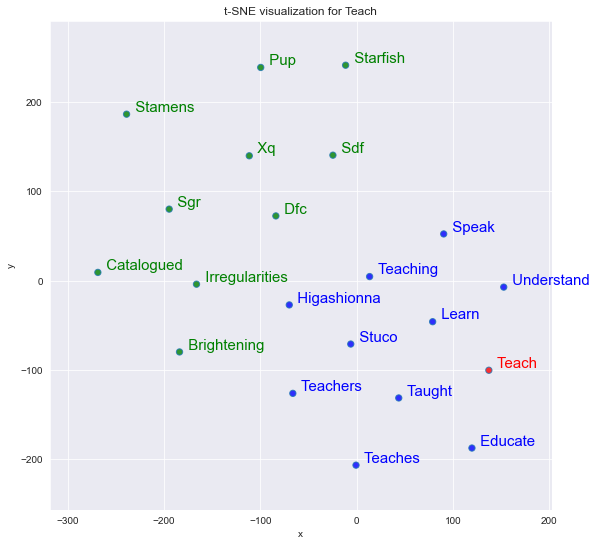

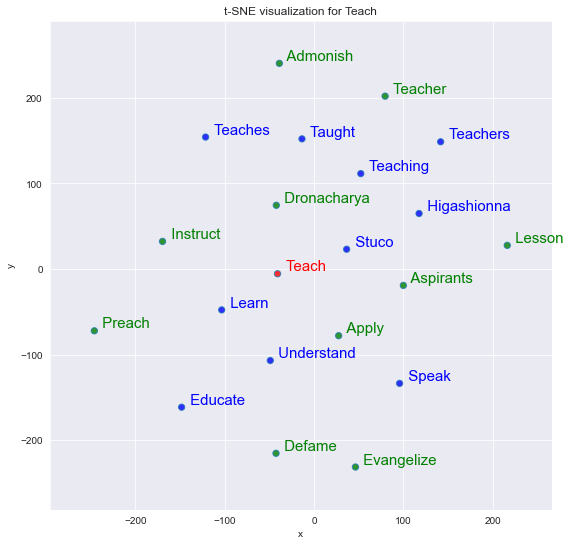

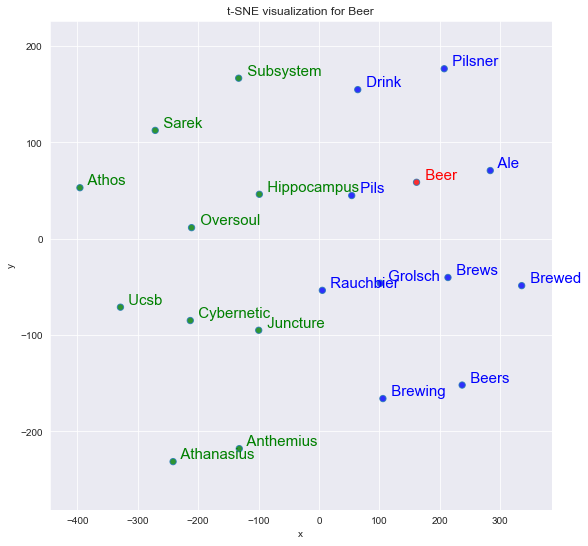

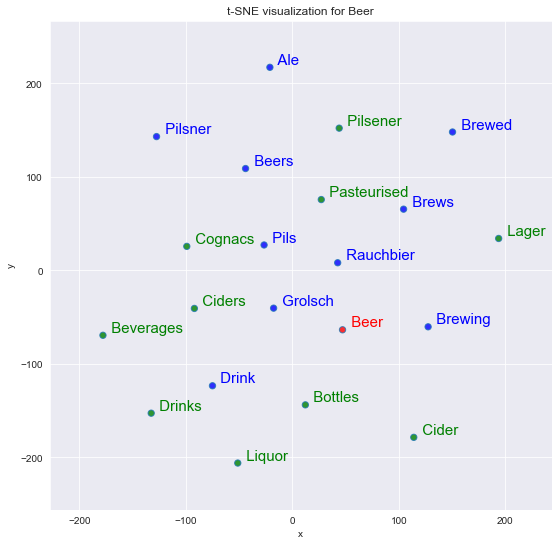

In [117]:
for word in tsn_list:
    tsnescatterplot(
        model_skip_gram,
        word,
        [i[0] for i in model_skip_gram.wv.most_similar(negative=[word])]
    )
    tsnescatterplot(
        model_skip_gram,
        word,
        [i[0] for i in model_skip_gram.wv.most_similar(positive=[word], topn=20)[10:]]
    )



### CBOW Distância e Semelhanças respectivamente

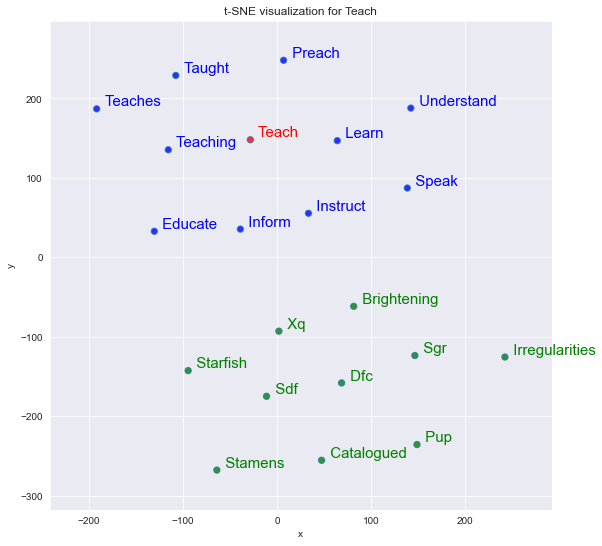

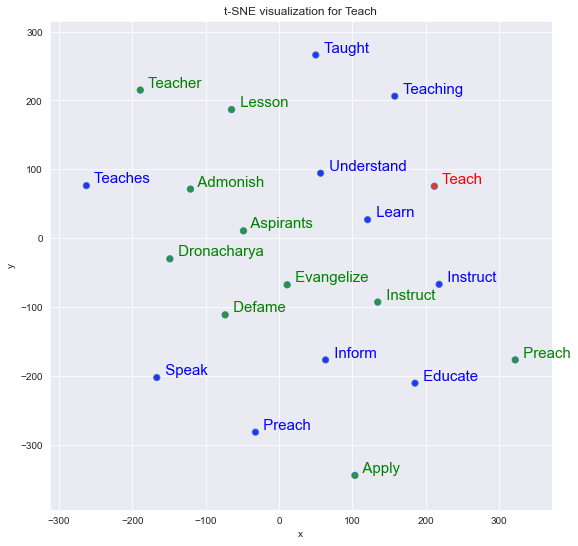

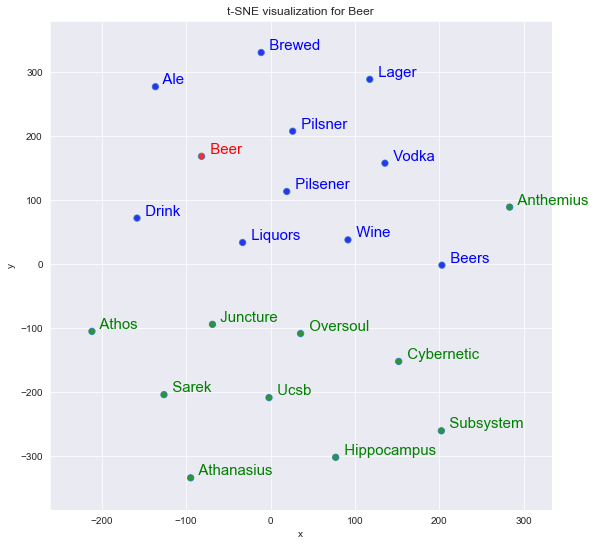

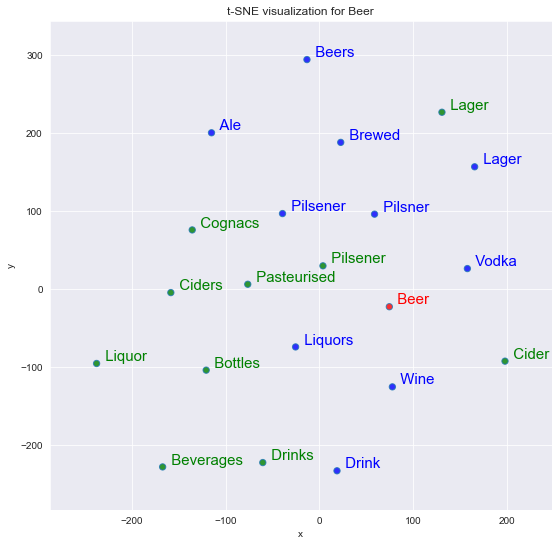

In [118]:
for word in tsn_list:

    tsnescatterplot(
        model_cbow,
        word,
        [i[0] for i in model_skip_gram.wv.most_similar(negative=[word])]
    )
    tsnescatterplot(
        model_cbow,
        word,
        [i[0] for i in model_skip_gram.wv.most_similar(positive=[word], topn=20)[10:]]
    )

## Lista Palavras para ver ortogonalidade

In [136]:
array = [
    "man",
    "king",
    "queen",
    "prince",
    "princess"
]

## Função para ajudar a gerar o plot

In [161]:
def plot(word_labels, model):
    def reduce_array_to_2d(array_to_be_reduced):
        reduc = PCA().fit_transform(array_to_be_reduced)
        numpy.set_printoptions(suppress=True)
        return TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    Y = numpy.array([model[datum.lower()] for datum in word_labels])
    Y = reduce_array_to_2d(Y)
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': 'black'})

    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)

    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                  }
                     )

    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                df['y'][line],
                '  ' + df["words"][line].title(),
                horizontalalignment='left',
                verticalalignment='bottom', size='medium',
                color=df['color'][line],
                weight='normal'
                ).set_size(15)

    plt.arrow(Y[2][0],Y[2][1],Y[3][0]-Y[2][0], Y[3][1]-Y[2][1], color='black')
    plt.arrow(Y[0][0],Y[0][1],Y[4][0]-Y[0][0], Y[4][1]-Y[0][1], color='black')

### Skip Gram

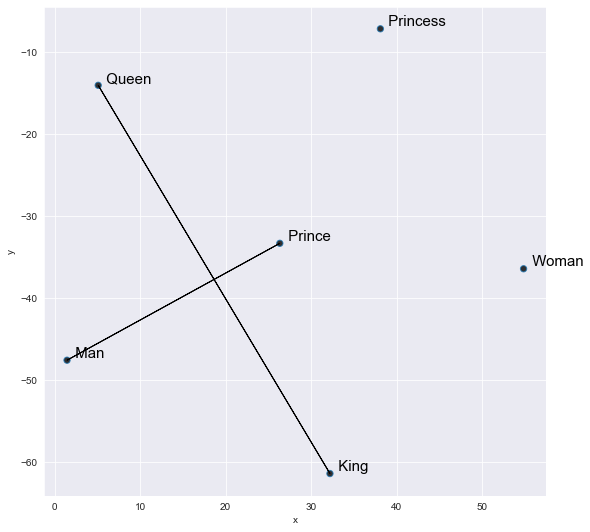

In [162]:
plot(array, model_skip_gram)

### CBOW

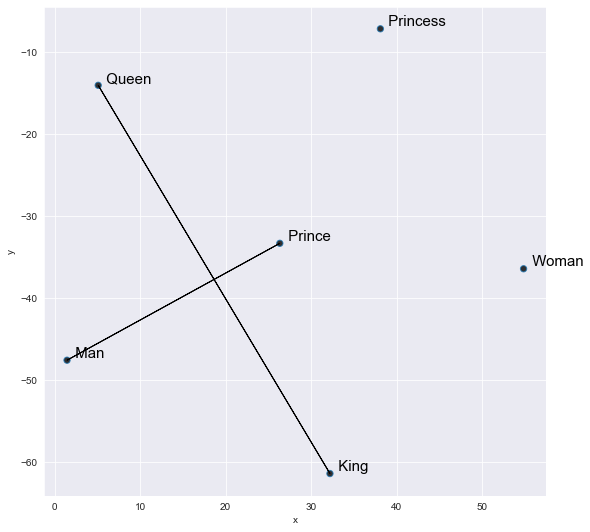

In [163]:
plot(array, model_cbow)


# [Parte 5] Conclusão

Foi possível notar algumas características vistas em sala de embeddings gerados pelas word2vec.
Começando por notar-se que, maior o corpus e maior o treino, maior a acurácia dos modelos.
As similaridades apresentadas fizeram bastante sentido em minha opinião, além de ver que cada
forma de calcular-se a similaridade dá diferentes valores para essas. Para os exemplos
de doest not match e de a to b, tivemos alguns erros: brazil não estar relacioando a minas gerais
e jãpãp está para ásia, assim como italy está para frança (esperava-se europa).

Para as visualizações, nota-se clusters entre as mais parecidas e menos, e maior espalhamento
entre as mais parecidas (principalmente porque usa-se a similaridade pelo cosseno). Para a
ortogonalidade de uma direção ser mais feminio e na outra status.